In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import sys

In [4]:
#Load data in pandas dataframe
np.set_printoptions(threshold=sys.maxsize)
TRAIN_PATH = "data/train.csv"
TEST_PATH = "data/test.csv"
train_df = pd.read_csv(TRAIN_PATH, index_col = 0)
test_df = pd.read_csv(TEST_PATH, index_col = 0)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h1>Data Analysis</h1>

<p>Combine training and testing datasets for preprocessing</p>

In [5]:
print("Total records :",len(train_df))

Total records : 1460


<h3>Investigate data</h3>

In [6]:
train_df.corr()["SalePrice"].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

<p><b>SalePrice</b>: Drop the outliers and reshape the target variable to reduce the skew </p>

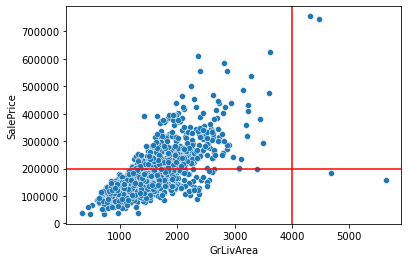

In [7]:
sns.scatterplot(data=train_df,x='GrLivArea',y='SalePrice')
plt.axvline(x=4000,color='r')
plt.axhline(y=200000,color='r')

In [8]:
#drop outliers
train_df = train_df.drop(train_df[(train_df.GrLivArea > 4000) & (train_df.SalePrice<200000)].index)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

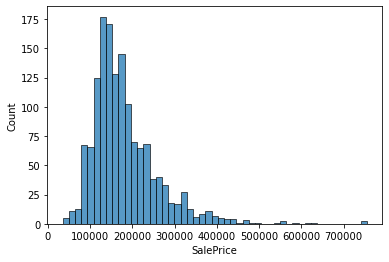

In [9]:
sns.histplot(train_df["SalePrice"])

In [10]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

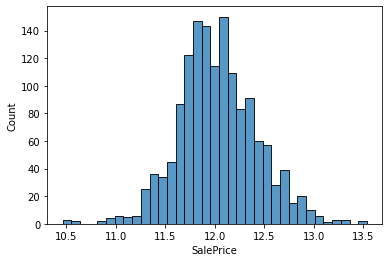

In [11]:
sns.histplot(train_df["SalePrice"])

<h3>Missing data</h3>

In [12]:
df =  pd.concat([train_df, test_df])
df.shape

(2917, 80)

In [13]:
#See how many columns have missing data
for col in df.columns:
    if sum(df[col].isnull()) !=0:
        print(col, ":", sum(df[col].isnull()),":", df[col].dtype)

MSZoning : 4 : object
LotFrontage : 486 : float64
Alley : 2719 : object
Utilities : 2 : object
Exterior1st : 1 : object
Exterior2nd : 1 : object
MasVnrType : 24 : object
MasVnrArea : 23 : float64
BsmtQual : 81 : object
BsmtCond : 82 : object
BsmtExposure : 82 : object
BsmtFinType1 : 79 : object
BsmtFinSF1 : 1 : float64
BsmtFinType2 : 80 : object
BsmtFinSF2 : 1 : float64
BsmtUnfSF : 1 : float64
TotalBsmtSF : 1 : float64
Electrical : 1 : object
BsmtFullBath : 2 : float64
BsmtHalfBath : 2 : float64
KitchenQual : 1 : object
Functional : 2 : object
FireplaceQu : 1420 : object
GarageType : 157 : object
GarageYrBlt : 159 : float64
GarageFinish : 159 : object
GarageCars : 1 : float64
GarageArea : 1 : float64
GarageQual : 159 : object
GarageCond : 159 : object
PoolQC : 2908 : object
Fence : 2346 : object
MiscFeature : 2812 : object
SaleType : 1 : object
SalePrice : 1459 : float64


<p><b>MSZoning</b> :Replace missing values with mode</p>

In [14]:
df["MSZoning"].value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [15]:
df['MSZoning'].fillna('RL', inplace=True)

<p><b>LotFrontage</b> :Assume here that neighborhoods contain similar houses</p>

In [16]:
#LotFrontage https://www.kaggle.com/niekvanderzwaag/housing-price-prediction-regression
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

<p><b>Alley</b> :NA means no alley</p>

In [17]:
df['Alley'].fillna('None', inplace=True)

<p><b>Utilities</b> :Utlities only have 1 record with another unique value, therefore the feature can safely be removed</p>

In [18]:
print(df["Utilities"].value_counts())
df = df.drop(["Utilities"], axis=1)

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64


<p><b>Exteriors</b> :Since there is only one missing value for both, they can be replaced by the most common value</p>

In [19]:
print(df["Exterior1st"].value_counts())
print(df["Exterior2nd"].value_counts())
df["Exterior1st"].fillna("VinylSd", inplace=True)
df["Exterior2nd"].fillna("VinylSd", inplace=True)

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
CBlock        2
Stone         2
AsphShn       2
ImStucc       1
Name: Exterior1st, dtype: int64
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64


<p><b>MasVnrType</b> :Missing values will be changed to None</p>

In [20]:
print(df["MasVnrType"].value_counts())
df['MasVnrType'].fillna('None', inplace=True)

None       1742
BrkFace     879
Stone       247
BrkCmn       25
Name: MasVnrType, dtype: int64


<p><b>MasVnrArea</b> :Missing values will be replaced to 0</p>

In [21]:
df["MasVnrArea"].fillna(0, inplace=True)

<p><b>Basement</b> :Missing values preplaced by None or 0, assume there is no basement</p>

In [22]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):    
    df[col].fillna('None', inplace=True)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtHalfBath', 'BsmtFullBath'):
    df[col].fillna(0, inplace=True)

<p><b>Garage</b> :Missing values preplaced by None or 0, assume there is no garage</p>

In [23]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):    
    df[col].fillna('None', inplace=True)
    
for col in ('GarageYrBlt', 'GarageCars', 'GarageArea'):
    df[col].fillna(0, inplace=True)

<p><b>Electrical</b> :Set missing vlaue to standard option</p>

In [24]:
df['Electrical'].fillna('SBrkr', inplace=True)

<p><b>KitchenQual</b> :Missing values set to standard</p>

In [25]:
df['KitchenQual'].fillna('TA', inplace=True)

<p><b>Functional</b> :Missing values set to None, assume it is typical</p>

In [26]:
df['Functional'].fillna('Typ', inplace=True)

<p><b>FireplaceQu</b> :Missing values preplaced by None, assume there is no fireplace</p>

In [27]:
df['FireplaceQu'].fillna('None', inplace=True)

<p><b>PoolQC</b> :Missing values set to None, assume there is no pool</p>

In [28]:
df['PoolQC'].fillna('None', inplace=True)

<p><b>Fence</b> :Missing values set to None, assume there is no Fence</p>

In [29]:
df['Fence'].fillna('None', inplace=True)

<p><b>MiscFeature</b> :Missing values set to None</p>

In [30]:
df['MiscFeature'].fillna('None', inplace=True)

<p><b>SaleType</b> :Missing values set to most common</p>

In [31]:
df['SaleType'].fillna('WD', inplace=True)

<h3>Encode string to integar classificaiton</h3>

In [32]:
df.shape

(2917, 79)

In [33]:
#MSSubClass
df['MSSubClass'].astype(str)

#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [34]:
#Change object data tpyes to integer classification

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

le = preprocessing.LabelEncoder()
for col in cols:
    if df[col].dtype == "object":
        df[col]=le.fit_transform(df[col])

<h3>Feature creation</h3>

In [35]:
df['BsmtFinSF'] = df.BsmtFinSF1 + df.BsmtFinSF2
df['Porch'] = df.ScreenPorch + df.EnclosedPorch + df.OpenPorchSF + df.WoodDeckSF + df['3SsnPorch']
df['Total_surface'] = df.TotalBsmtSF + df['1stFlrSF'] + df['2ndFlrSF']
df['Age'] = df.YrSold - df.YearBuilt
df['RemodAge'] = df.YrSold - df.YearRemodAdd
df['GarageAge'] = df.YrSold - df.GarageYrBlt
df['Overall'] = (df['OverallCond'] * df.OverallQual)
df['External_Overall'] = df['ExterCond'] * df['ExterQual']
df['LotArea_log'] = np.log(df['LotArea'])
df["Spaciousness"] = (df['1stFlrSF'] + df['2ndFlrSF']) / df.TotRmsAbvGrd
df['Porch_types'] = df[['ScreenPorch', 'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', '3SsnPorch']].gt(0.0).sum(axis=1)
df['WOW'] = np.sqrt(df['Overall'] * df['GrLivArea'])
df["MedNhbdArea"] = df.groupby("Neighborhood")["GrLivArea"].transform("median")
df['GarageOverall'] = df.GarageQual * df.GarageCond
df['GarageWow'] = df.GarageOverall * df.GarageArea
df['BsmtWow'] = df.BsmtCond * df.BsmtFinSF 
df['Freshness'] = df.Age * df.RemodAge 
df['Newness'] = np.sqrt(df.YearRemodAdd * df.GrLivArea)
df['Grand_Total'] = df.GrLivArea * 0.55 + df.GarageArea * 0.55 + df.BsmtFinSF * 0.4 + df.Porch * 0.5

In [36]:
df = pd.get_dummies(df)
df.shape

(2917, 239)

In [37]:
train = df.loc[train_df.index]
test = df.loc[test_df.index]

<h3>Models</h3>

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_log_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_regression,mutual_info_regression,SelectKBest

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [39]:
#Seperate X and y data
X = train.drop(["SalePrice"], axis=1)
y = np.array(train["SalePrice"])

<p>Sort the features by importance using the estimate mutual information</p>

In [40]:
importance = mutual_info_regression(X,y)
features = {}

for i,v in zip(X.columns,importance):
    features[i] = v

<AxesSubplot:>

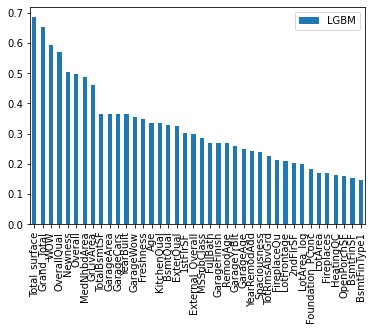

In [41]:
importances = pd.DataFrame({"LGBM":features})
importances.sort_values("LGBM", ascending = False, inplace=True)
importances[:40].plot.bar()

In [42]:
columns = importances[:40].index

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X[columns],y, test_size=0.2, random_state=42)

<h3>Models</h3>

In [44]:
knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_neighbors = 6))])
lasso = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.05, max_iter=10000, random_state=42))])
enet = Pipeline([('scaler', StandardScaler()), ('enet', ElasticNet(alpha=0.05, l1_ratio=0.75, max_iter=10000, random_state=42))])
ridge = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha=0.05, max_iter=10000, random_state=42))])
linear = Pipeline([('scaler', StandardScaler()), ('linear', LinearRegression())])
etree = Pipeline([('scaler', StandardScaler()), ('etree', ExtraTreesRegressor(max_samples=0.8, n_estimators=500, random_state=13, n_jobs=-1))])
xg = Pipeline([('scaler', StandardScaler()), ('xg', xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 500, seed = 13, subsample = 0.8, learning_rate = 0.1, reg_alpha=0.01, reg_lambda = 10))])

models = {"knn":knn,"lasso":lasso,"enet":enet,"ridge":ridge,"linear":linear,"etree":etree,"xg":xg}

<p>Initial of the models with the 40 best features </p>

knn 0.15264757520391972
lasso 0.1593508089305782
enet 0.15048271635609412
ridge 0.12657395237626914
linear 0.12621682770717604
etree 0.13335185762779822
xg 0.13744649641239548


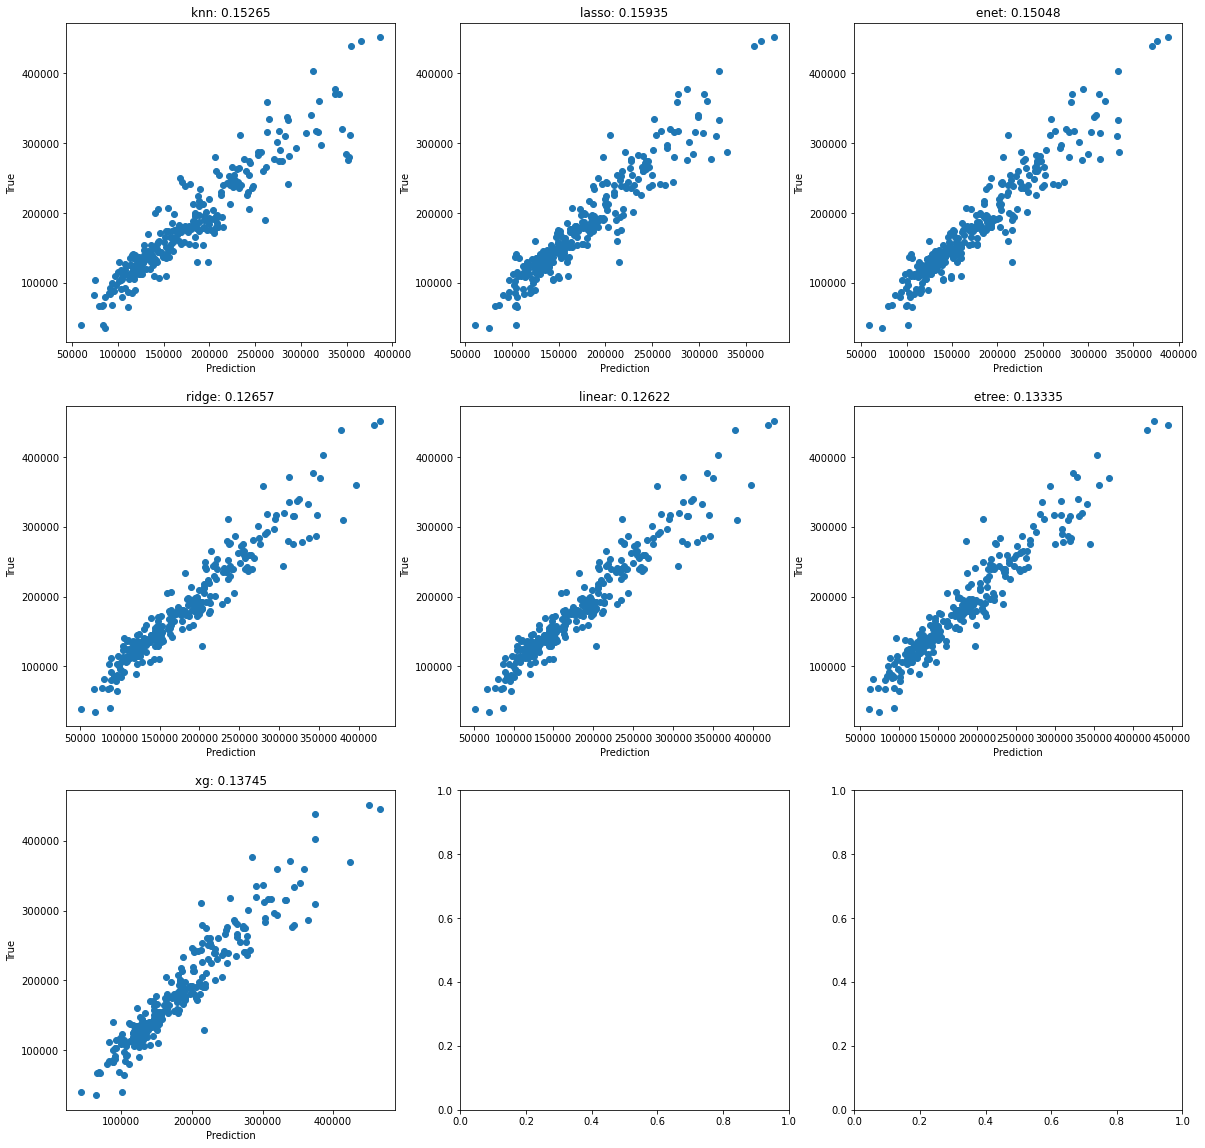

In [49]:
fig, axs = plt.subplots(3,3, figsize=(20,20))
for i, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        true = np.expm1(y_test)
        pred = np.expm1(y_pred)

        score =np.sqrt(mean_squared_log_error(true, pred))
        
        print(name,score)
        axs[i//3,i%3].title.set_text(name+": "+ str(round(score, 5)))
        axs[i//3,i%3].set_xlabel('Prediction')
        axs[i//3,i%3].set_ylabel('True')
        axs[i//3,i%3].scatter(pred, true)

<p>Find the best number of features to use for each model</p>

In [50]:
best_feature_num = {}
for name, model in models.items():
    best_feature_num[name] = [0, 1]
    for x in range(1,120):
        
        columns = importances[:x].index
        X_train, X_test, y_train, y_test = train_test_split(X[columns],y, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        true = np.expm1(y_test)
        pred = np.expm1(y_pred)

        score = np.sqrt(mean_squared_log_error(true, pred))
    
        if score <  best_feature_num[name][1]:
            best_feature_num[name][1] = score
            best_feature_num[name][0] = x

<p>Display new results with best number of features</p>

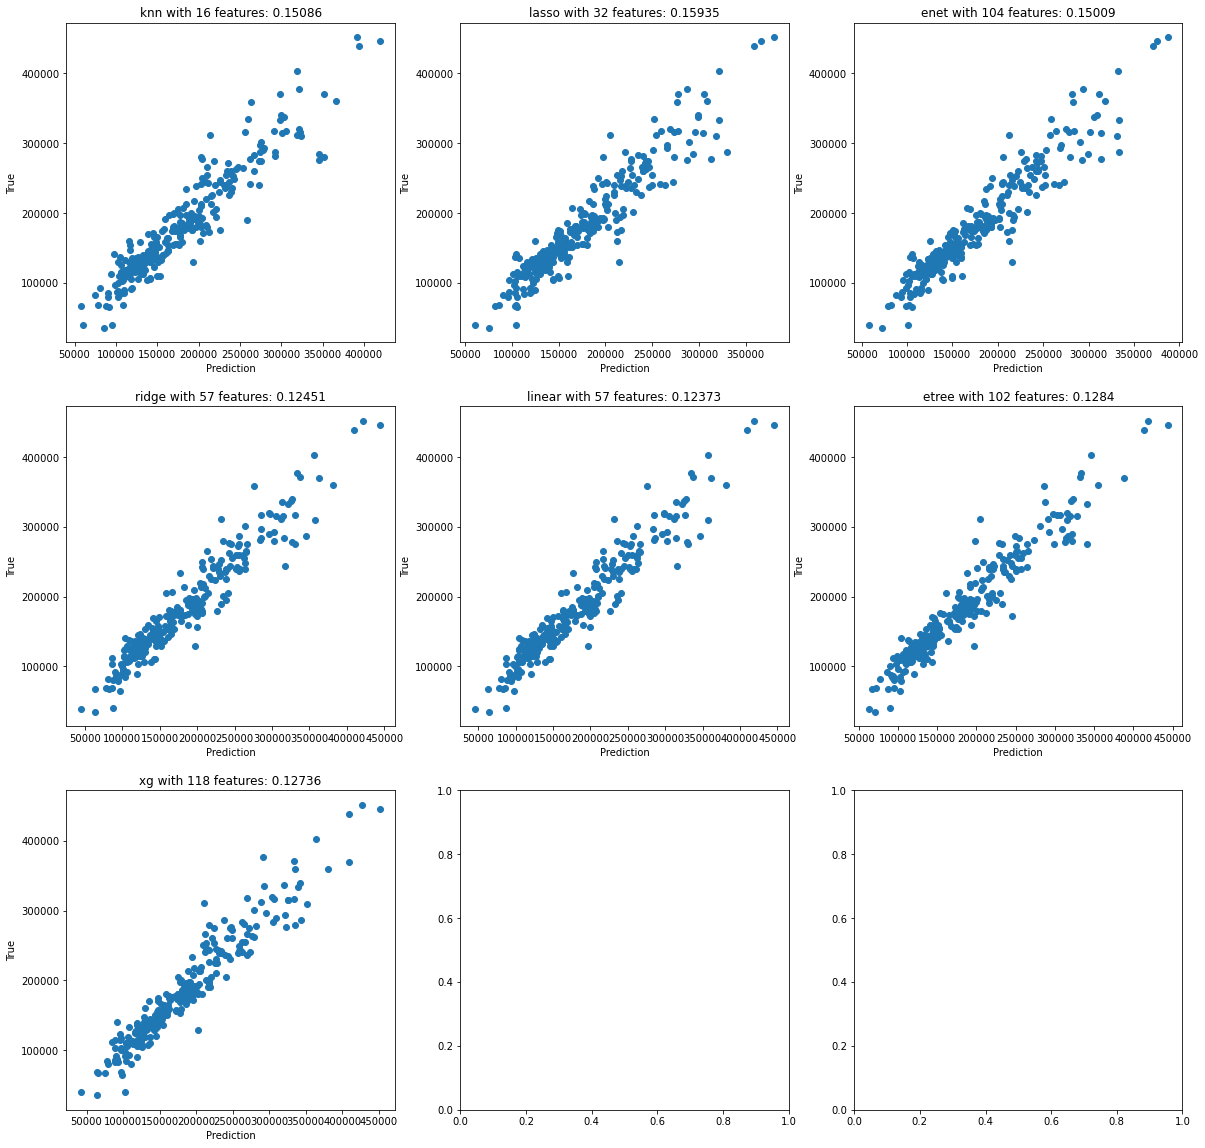

In [58]:
fig, axs = plt.subplots(3,3, figsize=(20,20))
for i, (name, model) in enumerate(models.items()):
    cols = best_feature_num[name][0]
    columns = importances[:cols].index
    X_train, X_test, y_train, y_test = train_test_split(X[columns],y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    true = np.expm1(y_test)
    pred = np.expm1(y_pred)

    score = np.sqrt(mean_squared_log_error(true, pred))

    axs[i//3,i%3].title.set_text(name+" with "+str(cols-1)+" features: "+ str(round(score, 5)))
    axs[i//3,i%3].set_xlabel('Prediction')
    axs[i//3,i%3].set_ylabel('True')
    axs[i//3,i%3].scatter(pred, true)

<h3>Predict test results</h3>

In [55]:
columns = importances[:58].index

X_test= test.drop(["SalePrice"], axis=1)[columns]

X_train = X[columns]
y_train = y

model = models["linear"].fit(X_train, y_train)
pred = model.predict(X_test)

In [56]:
test_results = pd.DataFrame({"Id" :X_test.index,"SalePrice": pred})
test_results["SalePrice"] = np.expm1(test_results["SalePrice"])
test_results.head(10)

,Id,SalePrice
0,1461,116923.494747
1,1462,159983.318698
2,1463,182701.973596
3,1464,205792.489354
4,1465,188201.756606
5,1466,171920.861915
6,1467,187726.108723
7,1468,164740.846618
8,1469,196107.158472
9,1470,112448.783509


In [57]:
test_results.to_csv('results6.csv', index=False)